In [1]:
import sys
import numpy as np
import pyqtgraph as pg
from PySide6 import QtWidgets, QtCore
from erlab.plotting.interactive.utilities import BetterColorBarItem, BetterImageItem
from erlab.plotting.interactive.colors import pg_colormap_powernorm
from erlab.plotting.interactive.imagetool_new import ColorMapGammaWidget

class ItoolColorBar(pg.PlotWidget):
    def __init__(self, **cbar_kw):
        super().__init__(plotItem=BetterColorBarItem(**cbar_kw))
        self.scene().sigMouseClicked.connect(self.getPlotItem().mouseDragEvent)

    @property
    def colorbar(self) -> BetterColorBarItem:
        return self.plotItem
    
    def getPlotItem(self) -> BetterColorBarItem:
        return self.plotItem

    def getPlotItemViewBox(self) -> pg.ViewBox:
        return self.getPlotItem().vb

class MainWindow(QtWidgets.QWidget):
    """ example application main window """
    def __init__(self, *args, **kwargs):
        self.qapp = QtCore.QCoreApplication.instance()
        if not self.qapp:
            self.qapp = QtWidgets.QApplication(sys.argv)
        self.qapp.setStyle("Fusion")

        super().__init__()

        self.setLayout(QtWidgets.QVBoxLayout(self))
        self.top = QtWidgets.QWidget(self)
        self.tlayout = QtWidgets.QHBoxLayout(self.top)
        self.gr_wid = pg.GraphicsLayoutWidget(show=True)
        self.tlayout.addWidget(self.gr_wid)
        self.layout().addWidget(self.top)
        
        self.gamma_wid = ColorMapGammaWidget()
        self.layout().addWidget(self.gamma_wid)
        self.gamma_wid.valueChanged.connect(
            lambda g: self._set_gamma(gamma=g)
        )
        
        # self.setCentralWidget(self.gr_wid)
        # self.setWindowTitle('pyqtgraph example: Interactive color bar')

        ## Create image items
        data = np.fromfunction(lambda i, j: (1+0.3*np.sin(i)) * (i)**2 + (j)**2, (200, 200))
        # noisy_data = data * (1 + 0.2 * np.random.random(data.shape) )
        # noisy_transposed = noisy_data.transpose()

        lvl = (data.min(), data.max())
        #--- add non-interactive image with integrated color ------------------
        p1 = self.gr_wid.addPlot(title="non-interactive")
        self.image = BetterImageItem(image=data)
        p1.addItem(self.image)
        self._set_gamma(0.5)
        # self.cbar = ItoolColorBar()
        self.cbar = BetterColorBarItem()
        self.cbar.setImageItem(image=self.image, insert_in=p1)
        # self.cbar = ItoolColorBar()
        
        
        # self.tlayout.addWidget(self.cbar)
        # self.cbar.colorbar.setImageItem(self.image)
        
        self.__post_init__(execute=True)
        
    def _set_gamma(self, gamma):
        cmap = pg_colormap_powernorm("magma",gamma)
        self.image._colorMap = cmap
        self.image.setLookupTable(cmap.getStops()[1], update=True)
        self.image.updateImage()
        self.image.sigColorChanged.emit()
        
    def __post_init__(self, execute=None):
        self.show()
        self.activateWindow()
        self.raise_()

        if execute is None:
            execute = True
            try:
                shell = get_ipython().__class__.__name__  # type: ignore
                if shell in ["ZMQInteractiveShell", "TerminalInteractiveShell"]:
                    execute = False
            except NameError:
                pass
        if execute:
            self.qapp.exec()
        
        
if __name__ == "__main__":
    win = MainWindow()

Activating auto-logging. Current session state plus future input saved.
Filename       : logs/6a9d823e-5610-4cea-91d0-290fcb328472_2023-03-20_09-37-56.log
Mode           : backup
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active
<class 'PyQt6.QtWidgets.QWidget'>


TypeError: 'singleStep' is an unknown keyword argument

In [2]:
qapp = QtCore.QCoreApplication.instance()

In [9]:
spin = QtWidgets.QAbstractSpinBox()


In [10]:
spin.setMinimum(10)

AttributeError: 'QAbstractSpinBox' object has no attribute 'setMinimum'

In [47]:
3.4*0.618*1.3

2.73156

In [46]:
3.4*1.3

4.42

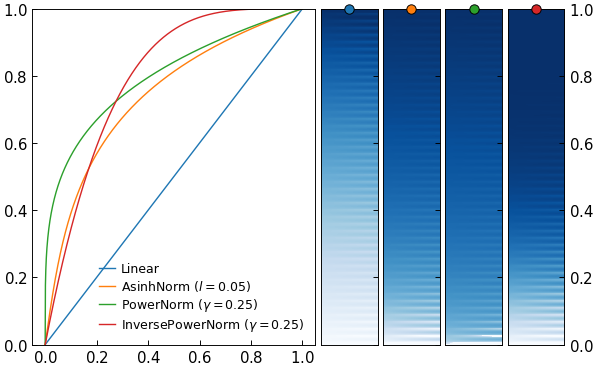

In [2]:
import matplotlib.pyplot as plt
import erlab.plotting.erplot as eplt
import pyqtgraph as pg
import numpy as np
import matplotlib.colors as mcolors

plt.style.use(['khan'])

gamma = 0.25
linw = 0.05
cmap = "Blues"

x = np.linspace(0, 1, 2048)

fig, axs = plt.subplots(1, 5, width_ratios=(5, 1, 1, 1,1), figsize=(4.42, 2.7316), layout="constrained")


axs[0].plot(x, x, label="Linear")
axs[0].plot(x, mcolors.AsinhNorm(linw, vmin=0, vmax=1)(x), label=f"AsinhNorm ($l={linw}$)")
axs[0].plot(x, mcolors.PowerNorm(gamma, vmin=0, vmax=1)(x), label=f"PowerNorm ($\\gamma={gamma}$)")
axs[0].plot(x, eplt.InversePowerNorm(gamma, vmin=0, vmax=1)(x), label=f"InversePowerNorm ($\\gamma={gamma}$)")
# axs[0].plot(x, eplt.InversePowerNorm(gamma, vmin=0, vmax=1)(x), label=f"InversePowerNorm ($\\gamma={gamma}$)")
# axs[0].plot(x, np.power(1 - x, gamma) * -1 + 1, label=f"InversePowerNorm ($\\gamma={gamma}$)")


bar_data = pg.colormap.modulatedBarData(384, 256)
for i, (ax, norm) in enumerate(zip(axs[1:], (
    None,
    mcolors.AsinhNorm(linw),
    mcolors.PowerNorm(gamma),
    eplt.InversePowerNorm(gamma),
    ))):
    ax.plot(0.5, 1, 'o', c=f"k", mew=0.5, ms=5, mfc=f"C{i}", transform=ax.transAxes, zorder=10, clip_on=False)
    ax.imshow(bar_data, extent=(0, 1, 0, 1), interpolation="none", rasterized=True, cmap=cmap, norm=norm)
    ax.yaxis.tick_right()
    ax.set_xticks([])
    # eplt.proportional_colorbar(plt.cm.ScalarMappable(cmap=cmap), cax=ax, norm=norm)

for ax in axs[1:-1]:
    ax.set_yticklabels([])

axs[0].sharey(axs[-1])
axs[0].legend(facecolor="none", edgecolor="none")
# fig.savefig("/Users/khan/Desktop/norm_test.pdf")

In [4]:
import matplotlib.sphinxext.plot_directive

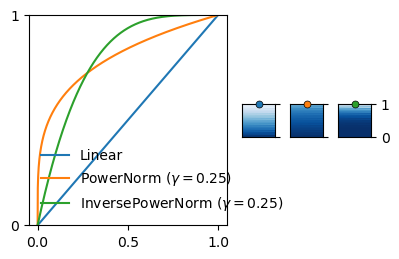

In [4]:
import numpy as np
import matplotlib

import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from pyqtgraph.colormap import modulatedBarData

import erlab.plotting.erplot as eplt

# plt.style.use(['khan', 'fira'])

gamma = 0.25
linw = 0.05
cmap = "Blues"

x = np.linspace(0, 1, 2048)

fig, axs = plt.subplots(1, 4, width_ratios=(6, 1, 1, 1), figsize=(4.42, 2.7316))


axs[0].plot(x, x, label="Linear")
# axs[0].plot(x, mcolors.AsinhNorm(linw, vmin=0, vmax=1)(x), label=f"AsinhNorm ($l={linw}$)")
axs[0].plot(x, mcolors.PowerNorm(gamma, vmin=0, vmax=1)(x), label=f"PowerNorm ($\\gamma={gamma}$)")
axs[0].plot(x, eplt.InversePowerNorm(gamma, vmin=0, vmax=1)(x), label=f"InversePowerNorm ($\\gamma={gamma}$)")
# axs[0].plot(x, eplt.InversePowerNorm(gamma, vmin=0, vmax=1)(x), label=f"InversePowerNorm ($\\gamma={gamma}$)")
# axs[0].plot(x, np.power(1 - x, gamma) * -1 + 1, label=f"InversePowerNorm ($\\gamma={gamma}$)")


bar_data = modulatedBarData(384, 256)
for i, (ax, norm) in enumerate(zip(axs[1:], (
    None,
    mcolors.PowerNorm(gamma),
    eplt.InversePowerNorm(gamma),
    ))):
    ax.plot(0.5, 1, 'o', c=f"k", mew=0.5, ms=5, mfc=f"C{i}", transform=ax.transAxes, zorder=10, clip_on=False)
    ax.imshow(bar_data, extent=(0, 1, 0, 1), interpolation="none", rasterized=True, cmap=cmap, norm=norm)
    ax.yaxis.tick_right()
    ax.set_xticks([])
    # eplt.proportional_colorbar(plt.cm.ScalarMappable(cmap=cmap), cax=ax, norm=norm)

for ax in axs[1:-1]:
    ax.set_yticklabels([])


axs[0].sharey(axs[-1])
axs[0].legend(facecolor="none", edgecolor="none")
# fig.savefig("/Users/khan/Desktop/norm_test.pdf"
# 
plt.show()

In [17]:
eplt.TwoSlopePowerNorm(gamma, vcenter=0.5, vmin=0, vmax=1).inverse(x).data

asdf


array([1.e+20, 1.e+20, 1.e+20, ..., 1.e+20, 1.e+20, 5.e-01])

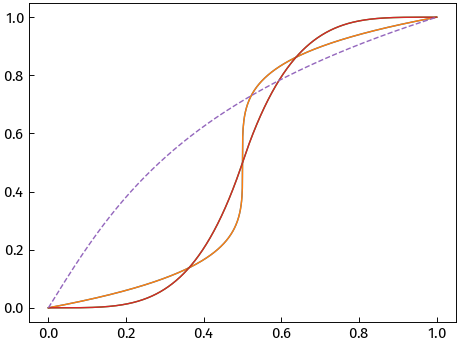

In [38]:
x = np.linspace(0, 1, 1024)
plt.plot(x, eplt.TwoSlopePowerNorm(gamma, vcenter=0.5, vmin=0, vmax=1)(x))
plt.plot(x, eplt.CenteredPowerNorm(gamma, vcenter=0.5,halfrange=0.5 )(x))
plt.plot(x, eplt.TwoSlopeInversePowerNorm(gamma, vcenter=0.5, vmin=0, vmax=1)(x))
plt.plot(x, eplt.CenteredInversePowerNorm(gamma, vcenter=0.5, halfrange=0.5)(x))
plt.plot(x, mcolors.AsinhNorm(linear_width=0.2, vmin=0, vmax=1)(x), '--')

# plt.plot(x, mcolors.PowerNorm(gamma, vmin=0, vmax=1).inverse(x))

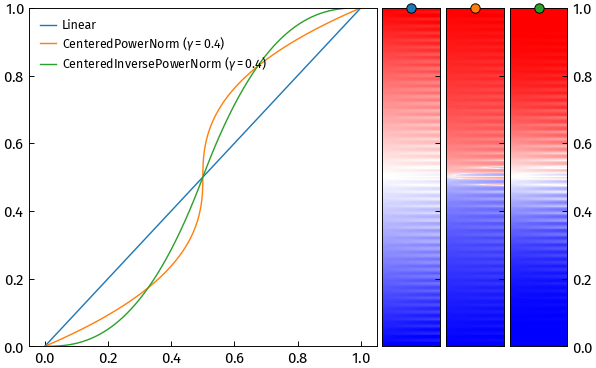

In [21]:

gamma = 0.4
cmap = "bwr"

x = np.linspace(0, 1, 2048)

fig, axs = plt.subplots(1, 4, width_ratios=(6, 1, 1, 1), figsize=(4.42, 2.7316), layout="constrained")


axs[0].plot(x, x, label="Linear")
axs[0].plot(x, eplt.CenteredPowerNorm(gamma, vcenter=0.5, halfrange=0.5)(x), label=f"CenteredPowerNorm ($\\gamma={gamma}$)")
axs[0].plot(x, eplt.CenteredInversePowerNorm(gamma, vcenter=0.5, halfrange=0.5)(x), label=f"CenteredInversePowerNorm ($\\gamma={gamma}$)")
# axs[0].plot(x, np.power(1 - x, gamma) * -1 + 1, label=f"InversePowerNorm ($\\gamma={gamma}$)")

bar_data = pg.colormap.modulatedBarData(384, 256)
for i, (ax, norm) in enumerate(zip(axs[1:], (None, eplt.CenteredPowerNorm(gamma, vcenter=0.5), eplt.CenteredInversePowerNorm(gamma, vcenter=0.5)))):
    ax.plot(0.5, 1, 'o', c=f"k", mew=0.5, ms=5, mfc=f"C{i}", transform=ax.transAxes, zorder=10, clip_on=False)
    ax.imshow(bar_data, extent=(0, 1, 0, 1), interpolation="none", rasterized=True, cmap=cmap, norm=norm)
    ax.yaxis.tick_right()
    ax.set_xticks([])
    # eplt.proportional_colorbar(plt.cm.ScalarMappable(cmap=cmap), cax=ax, norm=norm)

axs[2].set_yticklabels([])
axs[1].set_yticklabels([])

axs[0].sharey(axs[-1])
axs[0].legend(facecolor="none", edgecolor="none")

In [ ]:
import numpy as np
np.float64

In [ ]:
def _diverging_powernorm(result, gamma, vmin, vmax, vcenter):
    resdat = result.data
    resdat_ = resdat.copy()
    resdat_l = resdat[resdat_ < vcenter]
    resdat_u = resdat[resdat_ >= vcenter]
    resdat_l -= vcenter
    resdat_u -= vcenter
    resdat_l[resdat_l >= 0] = 0
    resdat_u[resdat_u < 0] = 0
    np.power(resdat_u, gamma, resdat_u)
    np.power(-resdat_l, gamma, resdat_l)
    resdat_u /= (vmax - vcenter) ** gamma
    resdat_l /= (vcenter - vmin) ** gamma
    resdat_u *= 0.5
    resdat_u += 0.5
    resdat_l *= -0.5
    resdat_l += 0.5
    resdat[resdat_ < vcenter] = resdat_l
    resdat[resdat_ >= vcenter] = resdat_u
    result = np.ma.array(resdat, mask=result.mask, copy=False)
    return result

def _diverging_powernorm_inv(value, gamma, vmin, vmax, vcenter):
    if np.iterable(value):
        val = np.ma.asarray(value)
        val_ = val.copy()
        val_l = val[val_ < 0.5]
        val_u = val[val_ >= 0.5]
        val[val_ < 0.5] = (
            np.ma.power(1 - 2 * val_l, 1.0 / gamma) * (vmin - vcenter) + vcenter
        )
        val[val_ >= 0.5] = (
            np.ma.power(2 * val_u - 1, 1.0 / gamma) * (vmax - vcenter) + vcenter
        )
        return np.ma.asarray(val)
    else:
        if value < 0.5:
            return pow(1 - 2 * value, 1.0 / gamma) * (vmin - vcenter) + vcenter
        else:
            return pow(2 * value - 1, 1.0 / gamma) * (vmax - vcenter) + vcenter



In [285]:
"(×%1.3g)" % 0.0001

'(×0.0001)'

In [3]:
import numpy as np
import numpy.typing as npt

np.dtype(float)
npt.nda

dtype('float64')

In [6]:
np.float64

numpy.float64

In [329]:
1e3 * np.log10(100)

2000.0

In [314]:
1-np.linspace(0, 1, 4)

array([1.        , 0.66666667, 0.33333333, 0.        ])

In [313]:
np.linspace(1,0, 4)

array([1.        , 0.66666667, 0.33333333, 0.        ])

In [308]:
def _viewstr_exponent(string: str):
    for k, v in zip(
        ("0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "-"),
        ("⁰", "¹", "²", "³", "⁴", "⁵", "⁶", "⁷", "⁸", "⁹", "⁻"),
    ):
        string = string.replace(k, v)
    return string


In [197]:
np.format_float_scientific(0.1, trim="-")

'1e-01'

In [ ]:
(×%.3G)

In [180]:
f"(×{0.00001:.3G})"

'(×1E-05)'

In [57]:
get_ipython()

In [155]:
import re
# print(ts)
# re.sub(r"1E\+0?(\d?\d)", r"10<sup>\1</sup>", ts)

(×1E+03)


'(×10<sup>3</sup>)'

'⁻³'

In [ ]:
re.find(r"1E\+?(\-?)0?(\d?\d)")

In [ ]:
"1E+03"

"10<sup></sup>"

In [97]:
np.format_float_scientific(1.0/0.01, min_digits=0   , unique=True, exp_digits=0, trim="-")

'1e+2'

In [25]:
pg.siScale(1000)

(0.001, 'k')

In [10]:
from PySide6 import QtGui

In [29]:
QtGui.QFontMetrics(spin.font()).boundingRect("0").width()


7

27

'0.00'

In [27]:
55-36

19

In [21]:
spin.minimumSizeHint()

PySide6.QtCore.QSize(55, 25)

In [15]:
spin.minimumSizeHint().width()

36

In [39]:
win.cbar.colorbar._images

[<weakref at 0x2adee9d50; to 'ImageItem' at 0x2b54fa780>]

In [2]:
import numpy as np
import numba
import xarray as xr

import erlab.plotting.erplot as eplt

@numba.njit(fastmath=True)
def E(kx, ky, a=6.97, t=0.76):
    val = t * np.sqrt(
        1
        + 4 * np.cos(0.5 * kx * a) ** 2
        + 4 * np.cos(0.5 * kx * a) * np.cos(0.5 * np.sqrt(3) * ky * a)
    )
    return val

@numba.njit(fastmath=True)
def spectral_function(w, bareband, Sreal, Simag):
    return -Simag / (np.pi * ((w - bareband - Sreal) ** 2 + Simag**2))



@numba.njit(fastmath=True)
def get_phase(kx, ky, a):
    m1 = np.round(a / 4 / np.pi * (kx + ky))
    m2 = np.round(np.sqrt(3) * a / 4 / np.pi * (kx - ky))
    # b1 = np.array([2*np.pi/a, 2*np.pi/np.sqrt(3)/a])
    # b2 = np.array([2*np.pi/a, -2*np.pi/np.sqrt(3)/a])
    # kvec = np.array([kx, ky])
    qx = kx - (m1+m2) * 2*np.pi/a - 4*np.pi/3/a
    qy = ky - (m1 - m2) * 2*np.pi/np.sqrt(3)/a
    # Gvec = m1*b1 + m2*b2
    # qvec = kvec - Gvec - np.array([4*np.pi/3/a,0])
    return np.arctan(qy/qx)

@numba.njit(fastmath=True)
def intensity_modulation(kx, ky, a):
    phi = get_phase(kx, ky, a)
    return np.cos(ky*a/np.sqrt(3)/2 -phi/2)**2

@numba.njit(fastmath=True)
def intensity_modulation_(kx, ky, a):
    phi = get_phase(kx, ky, a)
    phi += np.pi
    return np.cos(ky*a/np.sqrt(3)/2 -phi/2)**2


@numba.njit(fastmath=True, parallel=True)
def do_calc(nx:int, ny:int, nE:int, d:float, Emin:float, Emax:float, Sreal:float, Simag:float, a:float, t:float):
    out = np.zeros((nx, ny, nE), dtype=np.float64)
    x = np.linspace(-d, d, nx)
    y = np.linspace(-d, d, ny)
    z = np.linspace(Emin, Emax, nE)
    for i in numba.prange(len(x)):
        for j in range(len(y)):
            for k in range(len(z)):
                val = E(x[i], y[j], a, t)
                out[i, j, k] += spectral_function(z[k], val, Sreal, Simag) * intensity_modulation(x[i], y[j], a)
                out[i, j, k] += spectral_function(z[k], -val, Sreal, Simag) * intensity_modulation_(x[i], y[j], a)
    return x, y, z, out


def sample_data(nx=200, ny=200, nE=200, d=1.4, Emin=-1, Emax=1, Sreal=0.015, Simag=-0.1, a=6.97, t=0.76):
    x, y, z, val = do_calc(nx, ny, nE, d, Emin, Emax, Sreal, Simag, a, t)
    return xr.DataArray(val, coords=dict(kx=x, ky=y, eV=z))

out = sample_data()


Activating auto-logging. Current session state plus future input saved.
Filename       : logs/0d4559e2-932a-40dd-a18c-9f639f95c353_2023-03-05_17-20-40.log
Mode           : backup
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


In [3]:
eplt.itool_(out)

<erlab.plotting.interactive.imagetool_new.ImageTool(0x1660a4870) at 0x16d1cf180>

In [33]:
dims = ("hv","eV", "kx", "ky")

In [35]:
if all(s in dims for s in ("eV", "kx", "ky")):
    print(True)

True


In [40]:
tuple(d for d in dims if d not in ("eV", "kx", "ky"))

('hv',)

: 

In [36]:
set(dims) - set(("eV", "kx", "ky"))

{'hv'}

(1.0, -0.0)

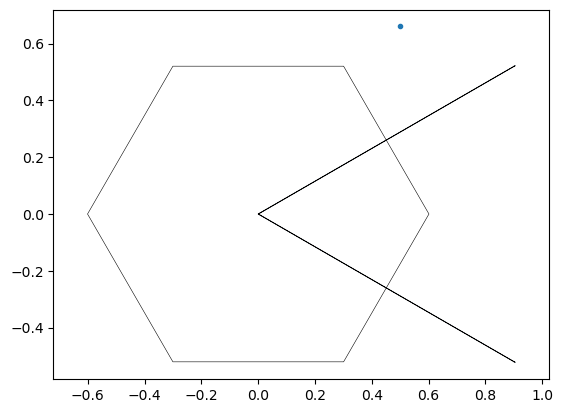

In [31]:
@numba.njit(fastmath=True)
def get_phase(kx, ky, a=6.97):
    m1 = np.round(a / 4 / np.pi * (kx + ky))
    m2 = np.round(np.sqrt(3) * a / 4 / np.pi * (kx - ky))
    # 
    # 
    # kvec = np.array([kx, ky])
    qx = kx - (m1+m2) * 2*np.pi/a - 4*np.pi/3/a
    qy = ky - (m1 - m2) * 2*np.pi/np.sqrt(3)/a
    # Gvec = m1*b1 + m2*b2
    # qvec = kvec - Gvec - np.array([4*np.pi/3/a,0])
    return m1, m2

b1 = np.array([2*np.pi/6.97, 2*np.pi/np.sqrt(3)/6.97])
b2 = np.array([2*np.pi/6.97, -2*np.pi/np.sqrt(3)/6.97])

point = 0.5*b1 + np.array([0.05, 0.4])

import erlab.plotting.erplot as eplt
import matplotlib.pyplot as plt

eplt.plot_hex_bz(a=6.97, ls="-", lw=0.4, ec='k', fc="None", rotate=90)
plt.plot(point[0], point[1], '.')
plt.arrow(0, 0, *b1, lw=0.5)
plt.arrow(0, 0, *b2, lw=0.5)
plt.axis("equal")

get_phase(*point)


array([0.50073065, 0.31022946])

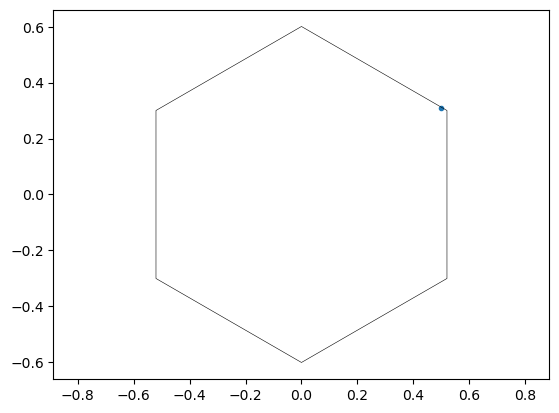

In [22]:
# plt.plot()


In [74]:
def transmat(a=6.97):
    return np.array(
        [
            [2 * np.pi / a, 2 * np.pi / np.sqrt(3) / a],
            [2 * np.pi / a, -2 * np.pi / np.sqrt(3) / a],
        ]
    )
np.linalg.inv(transmat())

array([[ 0.55465498,  0.55465498],
       [ 0.9606906 , -0.9606906 ]])

In [ ]:
    # b1 = np.array([2*np.pi/a, 2*np.pi/np.sqrt(3)/a])
    # b2 = np.array([2*np.pi/a, -2*np.pi/np.sqrt(3)/a])

In [75]:
6.97/4/np.pi * np.array([[1, 1],[np.sqrt(3), -np.sqrt(3)]])

array([[ 0.55465498,  0.55465498],
       [ 0.9606906 , -0.9606906 ]])

In [62]:
@numba.njit
def f(kx, ky, a):
    return np.exp(1j * ky * a / np.sqrt(3)) + 2 * np.exp(
        -1j * ky * a / 2 / np.sqrt(3)
    ) * np.cos(kx * a / 2)


@numba.njit
def ham(kx, ky, a=6.97, g0=3.0, s0=0.129, delta=0):
    fk = f(kx, ky, a)
    h1 = np.array([[delta / 2, -g0 * fk], [-g0 * np.conj(fk), -delta / 2]])
    s1 = np.array([[1, s0 * fk], [s0 * np.conj(fk), 1]])


(-1.4893675575468837-2.5807744702134294j)

In [82]:

get_phase(1, 1, 6.97)

-0.7620877377006338

In [44]:
%timeit sample_data()

7.26 ms ± 151 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [1]:
from PySide6 import QtWidgets

wid = QtWidgets.QDoubleSpinBox()

: 

: 

In [93]:
eplt.itool_(out)

<erlab.plotting.interactive.imagetool_new.ImageTool(0x32aa0ca30) at 0x32a6bd800>

In [3]:
import numpy as np
import xarray as xr
import pyqtgraph as pg
from PySide6 import QtWidgets, QtCore, QtGui
import sys

pg.mkQApp()

wdgts = [
    pg.PlotWidget(),
    pg.PlotWidget(),
    pg.PlotWidget(),
    pg.PlotWidget(),
    pg.PlotWidget(),
    pg.PlotWidget(),
    pg.PlotWidget(),
]
font = QtGui.QFont()
font.setPointSizeF(11.0)
for w in wdgts:
    w.setMinimumSize(0,0)
    w.plotItem.setMinimumSize(0,0)
    for axis in ["left", "bottom", "right", "top"]:
        w.plotItem.getAxis(axis).setTickFont(font)

class ItoolSplitter(QtWidgets.QSplitter):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def setStretchFactors(self, stretch):
        for i in range(self.count()):
            self.setStretchFactor(i, stretch[i])



def setstretch(widget, horiz, vert):
    policy = widget.sizePolicy()
    policy.setHorizontalStretch(horiz)
    policy.setVerticalStretch(vert)
    widget.resize(horiz * 10, vert * 10)
    widget.setSizePolicy(policy)


# wdgts[-1].setVisible(False)
# stretch = [
#     (6, 6),
#     (6, 2),
#     (2, 6),
#     (5, 5),
#     (6, 3),
#     (3, 6),
#     (0, 0),
# ]

# for w, s in zip(wdgts, stretch):
#     setstretch(w, *s)
#     pass


def syncsplit(c0, c1, reverse=False):
    c0.blockSignals(True)
    c1.blockSignals(True)

    sizes = c0.sizes()
    total = sum(sizes)
    
    if reverse:
        sizes = list(reversed(sizes))
        sizes[0] = c1.sizes()[-1]
    else:
        sizes[0] = c1.sizes()[0]
    if all([x == 0 for x in sizes[1:]]) and sizes[0] != total:
        sizes[1:] = [1] * len(sizes[1:])
    try:
        factor = (total - sizes[0]) / sum(sizes[1:])
    except ZeroDivisionError:
        factor = 0
    for k in range(1, len(sizes)):
        sizes[k] *= factor
    if reverse:
        sizes = list(reversed(sizes))
    c0.setSizes(sizes)

    c0.blockSignals(False)
    c1.blockSignals(False)

def set_splitter_sync(c0, c1, reverse=False):
    
    c0.splitterMoved.connect(lambda: syncsplit(c1, c0, reverse))
    c1.splitterMoved.connect(lambda: syncsplit(c0, c1, reverse))



main = QtWidgets.QWidget()
# lo = QtWidgets.QStackedLayout(main)
main.setLayout(QtWidgets.QStackedLayout())
lo = main.layout()

main_splitter = ItoolSplitter(QtCore.Qt.Vertical)

top_splitter = ItoolSplitter(QtCore.Qt.Horizontal)
top_subgroup_1 = ItoolSplitter(QtCore.Qt.Vertical)
top_subgroup_2 = ItoolSplitter(QtCore.Qt.Vertical)

bottom_splitter = ItoolSplitter(QtCore.Qt.Horizontal)
bottom_subgroup_1 = ItoolSplitter(QtCore.Qt.Vertical)
bottom_subgroup_2 = ItoolSplitter(QtCore.Qt.Horizontal)
# bottom_subgroup = ItoolSplitter(QtCore.Qt.Horizontal)

lo.addWidget(main_splitter)
lo.setContentsMargins(0,0,0,0)
main_splitter.addWidget(top_splitter)
main_splitter.addWidget(bottom_splitter)

top_splitter.addWidget(top_subgroup_1)
top_splitter.addWidget(top_subgroup_2)


bottom_splitter.addWidget(bottom_subgroup_1)
bottom_splitter.addWidget(bottom_subgroup_2)

for i in [1, 4]:
    top_subgroup_1.addWidget(wdgts[i])
for i in [6, 3]:
    top_subgroup_2.addWidget(wdgts[i])
bottom_subgroup_1.addWidget(wdgts[0])
for i in [5, 2]:
    bottom_subgroup_2.addWidget(wdgts[i])

set_splitter_sync(top_splitter, bottom_splitter, False)

szs = [
[298, 298],
[318, 278],
[126, 168],
[151, 143],
[318, 278],
[298],
[157, 117],
]


for i, c in enumerate([main_splitter, top_splitter, top_subgroup_1, top_subgroup_2, bottom_splitter, bottom_subgroup_1, bottom_subgroup_2]):
    c.setSizes(szs[i])


if __name__ == "__main__":
    qapp = QtWidgets.QApplication.instance()
    if not qapp:
        qapp = QtWidgets.QApplication(sys.argv)
    qapp.setStyle("Fusion")
    main.resize(600,600)
    main.show()
    main.raise_()
    qapp.exec()



vis_axes = [a for a in  ('left','top','right','bottom') if w.plotItem.getAxis(a).isVisible()]
print(vis_axes)

for i, c in enumerate([main_splitter, top_splitter, top_subgroup_1, top_subgroup_2, bottom_splitter, bottom_subgroup_1, bottom_subgroup_2]):
    print(c.sizes())

    

['left', 'bottom']
[298, 298]
[318, 278]
[126, 168]
[151, 143]
[318, 278]
[298]
[157, 117]


In [ ]:
[325, 325]
[535, 469]
[138, 183]
[162, 159]
[535, 469]
[325]
[266, 199]

In [3]:
import numpy as np
import xarray as xr
import pyqtgraph as pg
from PySide6 import QtWidgets, QtCore, QtGui
import sys

from erlab.plotting.interactive.colors import (
    pg_colormap_names,
    pg_colormap_powernorm,
    pg_colormap_to_QPixmap,
)

class itimage(pg.ImageItem):
    def __init__(self, 
        *args,
        **kargs,
    ):
        super().__init__(*args, **kargs)

    def set_colormap(
        self,
        cmap,
        gamma,
        reverse=False,
        highContrast=False,
        zeroCentered=False,
        update=True,
    ):
        cmap = pg_colormap_powernorm(
            cmap,
            gamma,
            reverse,
            highContrast=highContrast,
            zeroCentered=zeroCentered,
        )
        self.set_pg_colormap(cmap, update=update)

    def set_pg_colormap(self, cmap: pg.ColorMap, update=True):
        self._colorMap = cmap
        self.setLookupTable(cmap.getStops()[1], update=update)


class glw(pg.GraphicsLayoutWidget):
    def __init__(self, plotitem, parent=None, **item_kw):
        super().__init__(parent=parent)
        self.ci.layout.setSpacing(0)
        self.ci.layout.setContentsMargins(0, 0, 0, 0)

        self.plotItem = plotitem
        self.addItem(self.plotItem)

data = xr.open_dataarray(
    "/Users/khan/Documents/ERLab/CsV3Sb5/2021_Dec_ALS_CV3Sb5/Data/cvs_kxy_small.nc"
)




class MyWidget(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        self.pi = pg.PlotItem()
        self.gl = pg.PlotWidget(plotItem=self.pi)
        # self.gl = glw(self.pi)
        self.ii = itimage(image=data.sel(eV=0, method="nearest").values)
        self.pi.addItem(self.ii)
        
        
        self.layout = QtWidgets.QVBoxLayout(self)
        self.layout.addWidget(self.gl)
        
        # self.pi.addColorBar(self.ii)
        cbar = pg.HistogramLUTItem(image=self.ii)
        self.pi.layout.addItem( cbar, 2, 5 )
        self.pi.layout.setColumnFixedWidth(4, 5)
        self.ii.set_colormap("magma", 0.5)
        
        

    @QtCore.Slot()
    def magic(self):
        self.text.setText("hey")
    
if __name__ == "__main__":
    qapp = QtWidgets.QApplication.instance()
    if not qapp:
        qapp = QtWidgets.QApplication(sys.argv)
    qapp.setStyle("Fusion")
    # demo.set_data(data)
    demo = MyWidget()
    demo.show()
    demo.raise_()
    qapp.exec()

: 

NameError: name 'QtWidgets' is not defined

In [16]:
import numpy as np
import numba


@numba.njit(fastmath=True, cache=True)
def _index_of_value(
    axis: int,
    val: float,
    lims: tuple[tuple[float]],
    incs: tuple[float],
    shape: tuple[int],
) -> int:
    ind = min(
        round((val - lims[axis][0]) / incs[axis]),
        shape[axis] - 1,
    )
    if ind < 0:
        return 0
    return ind


@numba.njit(fastmath=True, cache=True)
def _index_of_value_nonuniform(arr, val) -> np.intp:
    return np.searchsorted((arr[:-1] + arr[1:]) / 2, val)


In [15]:
import xarray as xr

data = xr.open_dataarray(
        "/Users/khan/Documents/ERLab/CsV3Sb5/2021_Dec_ALS_CV3Sb5/Data/cvs_kxy_small.nc"
    )


crd = data.eV.values


_index_of_value()
# %timeit is_regular(crd)
# %timeit is_regular_(crd)
# %timeit is_regular__(crd)

2.82 µs ± 27.3 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
4.01 µs ± 36.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [12]:
is_regular__(crd)

True

True

In [1]:
import xarray as xr

data = xr.open_dataarray(
        "/Users/khan/Documents/ERLab/CsV3Sb5/2021_Dec_ALS_CV3Sb5/Data/cvs_kxy_small.nc"
    )

from slicer import SlicerArray

sa = SlicerArray(data)

# sa.add_cursor()
# sa.set_indices(1, (796, 17, 82))

# # print([i.shape for i in sa.coords])
# # print(sa._obj.dims)
# # print(sa._values[1])
# # print(sa._indices[1])

# sa.swap_axes(0,1)
# # print(sa._values[1])
# # print(sa._indices[1])

# print([i.shape for i in sa.coords])
# print(sa._obj.dims)

# sa.span_bounds(1, 0)
# sa.span_bounds(1, 1)
# sa.span_bounds(1, 2)

In [27]:
if "1":
    print("yeah")

yeah


In [5]:
type(data.shape)

tuple

In [27]:
sa.nanmin()

0.0

In [31]:
round(np.log10(abs(sa.nanmin())) + 3)

/var/folders/pm/phmf5d9d69s6znjj4sxp61yh0000gn/T/ipykernel_33078/2364280936.py:1: RuntimeWarning: divide by zero encountered in log10
  round(np.log10(abs(sa.nanmin())) + 3)


OverflowError: cannot convert float infinity to integer

In [6]:
import numpy as np
mx = 0.000000001

mn = -1.234112222222e+1

# round(np.log10(max(abs(mn), abs(mx))) + 3)
round(np.log10(abs(mx)) + 3)

-6

In [18]:
round(abs(np.log10(abs(4.96924931e-05))) + 3)

7

In [32]:
np.format_float_scientific(14237.137031508191, precision=7)
print(np.format_float_scientific(4.96924931, precision=7, unique=True, exp_digits=1))
print(np.format_float_scientific(4.96924931e-05, precision=7, unique=True))
print(np.format_float_scientific(14237.13703150819323, precision=7, unique=True))

4.9692493e+0
4.9692493e-05
1.4237137e+04


In [11]:
np.format_float_positional(14237.137031508191, precision=7)

'14237.1370315'

In [4]:
sa.absnanmax()

14237.137031508191

In [6]:
tuple[int]

tuple[int]

In [18]:

sa = SlicerArray(data)
print(sa._indices)
print(sa._values)
sa.add_cursor()
print(sa._indices)
print(sa._values)
# sa.set_indices(1, (796, 17, 82))
# print(sa._indices)
# print(sa._values)

[[519, 41, 83]]
[[-0.5008161067962646, -0.5199999999999994, -0.10999999999999854]]
[[519, 41, 83], [519, 41, 83]]
[[-0.5008161067962646, -0.5199999999999994, -0.10999999999999854], [-0.5008161067962646, -0.5199999999999994, -0.10999999999999854]]


In [16]:
lst = [[519, 41, 83], [519, 41, 83]]
lst[1][0] = 796
lst[1][1] = 17
lst[1][2] = 82
lst

[[519, 41, 83], [796, 17, 82]]

In [19]:
# sa._indices = [[519, 41, 83], [519, 41, 83]]
sa._indices[1][0] = 796
sa._indices[1][1] = 17
sa._indices[1][2] = 82
sa._indices

[[796, 17, 82], [796, 17, 82]]

In [14]:

i = 1
ax1 = 0
ax2 = 1
print(sa._values[i])
print(sa._indices[i])


sa._values[i][ax1], sa._values[i][ax2] = (
    sa._values[i][ax2],
    sa._values[i][ax1],
)
sa._indices[i][ax1], sa._indices[i][ax2] = (
    sa._indices[i][ax2],
    sa._indices[i][ax1],
)

print(sa._values[i])
print(sa._indices[i])

[-0.9999999999999998, -0.04819762706756592, -0.12999999999999856]
[17, 796, 82]
[-0.04819762706756592, -0.9999999999999998, -0.12999999999999856]
[796, 17, 82]


In [2]:
sa._indices

[[796, 17, 82], [796, 17, 82]]

In [3]:
sa._values

[[-0.5199999999999994, -0.5008161067962646, -0.10999999999999854],
 [-0.9999999999999998, -0.04819762706756592, -0.12999999999999856]]

In [11]:
import xarray as xr
import numpy as np
import numbagg
from PySide6 import QtWidgets, QtCore, QtGui
import pyqtgraph as pg
import colorsys
import darkdetect
from matplotlib import colors as mcolors
from pyqtgraph.dockarea.Dock import Dock, DockLabel
from pyqtgraph.dockarea.DockArea import DockArea
import sys
import itertools

from erlab.plotting.colors import (
    pg_colormap_names,
    pg_colormap_powernorm,
    pg_colormap_to_QPixmap,
)


<frozen importlib._bootstrap>:241: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 88 from PyObject


Activating auto-logging. Current session state plus future input saved.
Filename       : logs/70502d64-620f-4e97-bb77-2f2666bdb83e_2022-09-13_11-34-56.log
Mode           : backup
Output logging : False
Raw input log  : False
Timestamping   : False
State          : active


Fontconfig warning: ignoring UTF-8: not a valid region tag


In [2]:
import PySide6
import PySide6.sip

ModuleNotFoundError: No module named 'PySide6.sip'

In [7]:
np.around([123.1235, 12346.1235], 6)

array([  123.1235, 12346.1235])

In [91]:
data.max()

<xarray.DataArray ()>
array(14237.13703151)
Coordinates:
    x        float64 ...
    y        float64 ...
    z        float64 ...
    hv       float64 ...

In [96]:
for i, v in sorted(enumerate(["z",3,"a",8]), reverse=True):
    print(i,v)

3 8
2 a
1 3
0 z


In [ ]:
it = iter(s)
a = next(it, None)
return all(a == b for b in it)


In [8]:

from PySide6 import QtWidgets, QtCore, QtGui
import sys
class MyWidget(QtWidgets.QWidget):
    def __init__(self):
        super().__init__()
        print(QtGui.QFontMetrics(self.font()).height())
        print(QtGui.QFontMetrics(self.font()).boundingRect('X').height())
        self.button = QtWidgets.QPushButton("Click me!")
        self.text = QtWidgets.QLabel("Hello World",
                                     alignment=QtCore.Qt.AlignCenter)

        self.layout = QtWidgets.QVBoxLayout(self)
        self.layout.addWidget(self.text)
        self.layout.addWidget(self.button)

        self.button.clicked.connect(self.magic)

    @QtCore.Slot()
    def magic(self):
        self.text.setText("hey")
    
if __name__ == "__main__":
    qapp = QtWidgets.QApplication.instance()
    if not qapp:
        qapp = QtWidgets.QApplication(sys.argv)
    qapp.setStyle("Fusion")
    # demo.set_data(data)
    demo = MyWidget()
    demo.show()
    demo.raise_()
    qapp.exec()

16
15


NameError: name 'data' is not defined

In [ ]:
\bT12\parens{\muu1-\muu2}+\bT13\parens{\muu1-\muu3}+\bT14\parens{\muu1-\muu4}+\dots

In [113]:
import numba
# @numba.njit
def is_even(arr):
    diff = np.diff(arr)
    d0 = diff[0]
    return np.all(diff == diff[0])
    # return len(set(diff)) == 1
    # return np.amin(diff) == np.amax(diff)

is_even(data.eV.values)
%timeit is_even(data.eV.values)

14.6 µs ± 98.1 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [92]:
np.log10(14237.13703151)

4.153422665113727

In [12]:
data = xr.open_dataarray(
        "/Users/khan/Documents/ERLab/CsV3Sb5/2021_Dec_ALS_CV3Sb5/Data/cvs_kxy_small.nc"
    )

In [28]:
import pandas as pd

df = data.rename('hello').to_dataframe()
df['hello'].value

AttributeError: 'Series' object has no attribute 'value'

: 

In [30]:
lims = data._slicer.lims[0]
inc = data._slicer.incs[0]
(lims[1] - lims[0])/inc

1039.0

In [36]:
arr = np.arange(30).astype(float)*0.25 + 3
arr

array([ 3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,  4.5 ,  4.75,  5.  ,
        5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,  6.75,  7.  ,  7.25,
        7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,  9.  ,  9.25,  9.5 ,
        9.75, 10.  , 10.25])

In [57]:
np.searchsorted(arr+(0.25/2), 3.126)

1

In [73]:
import numba
@numba.njit(fastmath=True, cache=True)
def index_of_value_jit(arr, val):
    inc = arr[1] - arr[0]
    
    ind = min(
        round((val - arr[0]) / inc),
        len(arr) - 1,
    )
    if ind < 0:
        return 0
    return ind
@numba.njit(fastmath=True, cache=True)
def nearest_value_jit(arr, val):
    inc = arr[1] - arr[0]
    
    ind = max(min(
        round((val - arr[0]) / inc),
        len(arr) - 1,
    ), 0)
    return inc * ind + arr[0]

@numba.njit(fastmath=True, cache=True)
def index_of_value_regular_jit(arr, val):
    return np.searchsorted((arr[:-1] + arr[1:]) / 2, val)


arr = data.eV.values
nearest_value_jit(arr,-0.73142412)
# %timeit index_of_value_jit(arr, -0.73142412)


# %timeit index_of_value_regular_jit(arr, -0.73142412)

-0.7312103509902954

In [88]:
np.log10(12144.2325)

4.084370073151247

In [87]:
import numpy as np
np.format_float_positional(12331329.93532, 7, fractional=False)

'12331330.'

In [69]:
np.diff(arr)

array([0.001634, 0.001634, 0.001634, ..., 0.001634, 0.001634, 0.001634])

array([-1.348046  , -1.346412  , -1.344778  , ...,  0.34477979,
        0.34641379,  0.34804779])

In [ ]:
5.625

In [37]:
(5.5222111 - arr[0])/0.25

10.0888444

In [29]:
data.shape

(1040, 83, 167)

In [25]:
import numbagg
numbagg.nanmax(data.values)

14237.137031508191

In [16]:
np.format_float_positional(123.123512, 6, fractional=False)

'123.124'

In [4]:
from arpes.utilities.conversion.core import grid_interpolator_from_dataarray
data = xr.open_dataarray(
        "/Users/khan/Documents/ERLab/CsV3Sb5/2021_Dec_ALS_CV3Sb5/Data/cvs_kxy_small.nc"
    )

interpolator = grid_interpolator_from_dataarray(data, method="linear")


Interpolator(lower_corner=[-1.3488630056381226, -1.34, -1.77], delta=[0.0016340017318725586, 0.020000000000000018, 0.020000000000000018], shape=[1040, 83, 167], data=array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..

In [14]:
demo.profiles[0].plotItem.vb.autoRangeEnabled()

[False, True]

In [52]:
%autoreload 2
%gui qt
from imagetool_new import ImageSlicerArea
if __name__ == "__main__":
    qapp = QtWidgets.QApplication.instance()
    if not qapp:
        qapp = QtWidgets.QApplication(sys.argv)
    qapp.setStyle("Fusion")
    data = xr.open_dataarray(
        "/Users/khan/Documents/ERLab/CsV3Sb5/2021_Dec_ALS_CV3Sb5/Data/cvs_kxy_small.nc"
    )
    demo = ImageSlicerArea()
    demo.set_data(data)
    demo.show()
    demo.raise_()

In [6]:
data = xr.open_dataarray(
        "/Users/khan/Documents/ERLab/CsV3Sb5/2021_Dec_ALS_CV3Sb5/Data/cvs_kxy_small.nc"
    )

lims = data._slicer.lims
incs = data._slicer.incs
import numba
@numba.njit
def index_of_value(axis, val, lims, incs, shape):
    ind = min(
        round((val - lims[axis][0]) / incs[axis]),
        shape[axis] - 1,
    )
    if ind < 0:
        return 0
    return ind

index_of_value(0, 12.3222, lims, incs, data.shape)

1039

In [7]:
data._slicer.indices

[519, 41, 83]

In [10]:
@numba.njit
def _bin_slice(center, window):
    return center - window // 2, center + (window - 1) // 2 + 1

slice(*_bin_slice(3, 1))

slice(3, 4, None)

[0, 1]

In [14]:
@numba.njit
def return_transposed(arr):
    if arr.ndim == 2:
        return arr.T
    elif arr.ndim == 3:
        return arr.transpose(1, 2, 0)
    elif arr.ndim == 4:
        return arr.transpose(1, 2, 3, 0)



array([[[[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [ 0.],
         [ 0.],
         [ 0.]],

        ...,

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]]],


       [[[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [nan],
         [nan],
         [nan]],

        [[nan],
         [nan],
         [nan],
         ...,
         [ 0.],
         [

In [68]:
any(elem not in [0, 1] for elem in [0, 2])

True

In [39]:

clr = pg.mkColor("w")
clr.setAlphaF(0.75)
clr

PySide6.QtGui.QColor.fromRgbF(1.000000, 1.000000, 1.000000, 0.749996)

In [49]:
clr.toTuple()

(255, 255, 255, 191)

In [98]:
profile_axes = [1, 2, 3, 6]
profile_axes_new = []
for i in range(2):
    profile_axes_new += [10 * i + p for p in profile_axes]
profile_axes_new

[1, 2, 3, 6, 11, 12, 13, 16]

In [110]:
profile_axes = [1, 2, 3, 6]
profile_axes = [10 * i + p for i in range(6) for p in profile_axes]
profile_axes

[1,
 2,
 3,
 6,
 11,
 12,
 13,
 16,
 21,
 22,
 23,
 26,
 31,
 32,
 33,
 36,
 41,
 42,
 43,
 46,
 51,
 52,
 53,
 56]

In [2]:
data = xr.open_dataarray(
    "/Users/khan/Documents/ERLab/CsV3Sb5/2021_Dec_ALS_CV3Sb5/Data/cvs_kxy_small.nc"
)

In [4]:
%gui qt
app = pg.mkQApp("Crosshair Example")
win = pg.GraphicsLayoutWidget(show=True)
win.setWindowTitle('pyqtgraph example: crosshair')
# label = pg.LabelItem(justify='right')
# win.addItem(label)
p1 = win.addPlot()
i1 = pg.ImageItem()
i1.setImage(data.sel(eV=-0.5, method="nearest").values)
i2 = pg.ImageItem()
i2.setImage(data.sel(eV=-0, method="nearest").values)
p1.addItem(i1)
p1.addItem(i2)
i2.setVisible(False)
pg.exec()

0

In [83]:
for i in range(1, 1):
    print(i)

1


In [68]:
demo.profiles[0].

AttributeError: 'ItoolPlotDataItem' object has no attribute 'listDataItems'

In [62]:
# demo._container_bottom.stretch()
%gui qt

pw = pg.PlotWidget()
img = pg.PlotDataItem()

pw.addItem(img)
rect, vals = data._slicer.slice_with_coord((0,))
# img.setImage(img=vals)
img.setData(rect, vals)
pw.show()

qt.pointer.dispatch: delivering touch release to same window QWidgetWindow(0x16a0b32d0, name="ImageSlicerClassWindow") not QWidgetWindow(0x2e428e290, name="PlotWidgetClassWindow")
qt.pointer.dispatch: delivering touch release to same window QWindow(0x0) not QWidgetWindow(0x16a0b32d0, name="ImageSlicerClassWindow")
qt.pointer.dispatch: skipping QEventPoint(id=3 ts=0 pos=0,0 scn=652.92,619.905 gbl=652.92,619.905 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-652.92,-619.905 last=-652.92,-619.905 Δ 652.92,619.905) : no target window
qt.pointer.dispatch: skipping QEventPoint(id=4 ts=0 pos=0,0 scn=637.8,670.845 gbl=637.8,670.845 Released ellipse=(1x1 ∡ 0) vel=0,0 press=-637.8,-670.845 last=-637.8,-670.845 Δ 637.8,670.845) : no target window


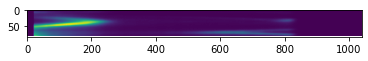

In [44]:
from matplotlib import pyplot as plt
plt.imshow(vals)

AttributeError: 'numpy.ndarray' object has no attribute 'fillna'

In [36]:
rect

(-1.3496800065040588, -1.35, 1.699361801147461, 0.28000000000000136)

In [40]:
rect

PySide6.QtCore.QRectF(-1.349680, -1.350000, 1.699362, 1.660000)

In [ ]:
QtCore.QRectF

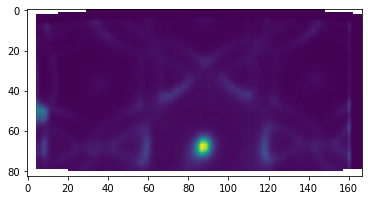

In [30]:
rect, arr = data._slicer.slice_with_coord((1, 2))

import matplotlib.pyplot as plt

plt.imshow(arr, )

(<__main__.ItoolPlotWidget(0x1360d9d10) at 0x2883ebe80>,
 <__main__.ItoolPlotWidget(0x28c736770) at 0x285c09ec0>,
 <__main__.ItoolPlotWidget(0x28c864ca0) at 0x28a0ea240>)

In [28]:
demo._container_top.stretch()

(55, 25)

In [69]:
l1 = [0, 1, 2, 3]
l2 = l1
l2.remove(3)

In [76]:
dat.dims

('eV', 'kx', 'ky')

In [51]:
demo.get_axes(1).addItem(xImageItem())

In [ ]:
pg.PlotWidget

In [3]:
[i if i not in (1, 2) else for i in range(4)]

[0, '', '', 3]

[0, 3]

In [78]:
dat_4d = xr.open_dataarray(
        "/Users/khan/Documents/ERLab/TiSe2/220410_ALS_BL4/map_mm_4d.nc"
    )

In [79]:
dat_4d.values.shape

(3, 1040, 108, 608)

In [86]:
dat_4d._slicer.extract_slice((2,3)).shape

(1040, 3)

In [53]:
pw=  demo.get_axes(1)

In [ ]:
pw.find

In [5]:
demo.getLargeContainer(demo.get_dock(0))

<pyqtgraph.dockarea.Container.HContainer(0x281366d90) at 0x2812206c0>

In [138]:
demo.topContainer

<pyqtgraph.dockarea.Container.VContainer(0x2d0bb1f30) at 0x2d347a280>

In [109]:
demo.get_dock(1).container().container().container().container()

<__main__.DockDemo(0x2d0375eb0) at 0x2d17a6680>

In [147]:
i=0
j=0
while i != 5:
    j = i
    i = i + 1
    print(j)
    # print(i)
    

0
1
2
3
4


In [112]:
demo.topContainer.

<pyqtgraph.dockarea.Container.VContainer(0x2d09215a0) at 0x2af23cf80>

In [97]:
list(demo.docks.keys())

['1', '0', '2', '3', '4', '5', '9']

In [89]:
len(dict(a=1, b=3))

2

In [57]:
demo.docks[0].container()

<pyqtgraph.dockarea.Container.HContainer(0x298061e40) at 0x29780b400>

In [58]:
demo.docks[3].container()

<pyqtgraph.dockarea.Container.HContainer(0x298077a60) at 0x28d045ec0>

In [49]:
demo.docks[3].container().sizes()

[72, 641]

In [30]:
containers, _ = demo.dockarea.findAll()

[357, 356]

In [114]:
demo.

PySide6.QtCore.Qt.DockWidgetAreaSizes.NDockWidgetAreas

In [3]:
ls = [None, 13, None]

tuple(i for i, x in enumerate(ls) if x != None)

(1,)

In [174]:
import pyqtgraph.jupyter

pyqtgraph.jupyter.GraphicsLayoutWidget